In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/rent_airbnb_all_features.csv')
print(df.shape)
df.head()

(1752, 37)


,year,quarter,district_code,district_name,neighbourhood_code,neighbourhood_name,price_month(€),price_m2_month(€),From 6 months to 12 motnhs,Over 12 months,...,woman_junior_high_school,woman_senior_high_school,woman_unknown,woman_without education,airbnb_price(€),n_airbnb_listings,availability_365,airbnb_ratio_business,airbnb_professional_ratio,airbnb_mega_host_ratio
0,2015.0,2015-01-01,1.0,Ciutat Vella,4.0,"Sant Pere, Santa Caterina i la Ribera",697.16,11.51,2949.0,8425.0,...,1464.0,2067.0,5.0,470.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015.0,2015-04-01,1.0,Ciutat Vella,4.0,"Sant Pere, Santa Caterina i la Ribera",708.03,12.02,2949.0,8425.0,...,1464.0,2067.0,5.0,470.0,73.343300,903.0,262.921373,0.631229,0.128461,0.016611
2,2015.0,2015-07-01,1.0,Ciutat Vella,4.0,"Sant Pere, Santa Caterina i la Ribera",729.00,14.00,2949.0,8425.0,...,1464.0,2067.0,5.0,470.0,75.124776,1114.0,259.641831,0.607720,0.106822,0.002693
3,2015.0,2015-10-01,1.0,Ciutat Vella,4.0,"Sant Pere, Santa Caterina i la Ribera",751.60,13.43,2949.0,8425.0,...,1464.0,2067.0,5.0,470.0,72.410441,1111.0,271.629163,0.580558,0.067507,0.001800
4,2016.0,2016-01-01,1.0,Ciutat Vella,4.0,"Sant Pere, Santa Caterina i la Ribera",759.16,12.94,2563.0,7550.0,...,1509.0,2196.0,121.0,376.0,72.739919,992.0,260.639113,0.561492,0.073589,0.000000


## Simplifying the features

We are going to make some changes to the features:
- We'll leave 4 levels for the nationalities data: *1 Spanish", *1 foreign", *2 or more Spanish*, *2 or more foreigners*
- Two levels of unemployment: *short-term unemployment* (under 12 months) and *long-term unemployment* (above 12 months)
- Three levels of education (women + men): *no education*, *medium education*, *bachelors degree*

In [3]:
df.columns

Index(['year', 'quarter', 'district_code', 'district_name',
       'neighbourhood_code', 'neighbourhood_name', 'price_month(€)',
       'price_m2_month(€)', 'From 6 months to 12 motnhs', 'Over 12 months',
       'Up to 6 months', '1 Spanish', '1 foreigner', '2 Spanish',
       '2 foreigners', '3 Spanish', '3 foreigners', '4 espanyols o més',
       'more than 4 foreigners', 'man_bachelors_degree',
       'man_elementary_school', 'man_junior_high_school',
       'man_senior_high_school', 'man_unknown', 'man_without education',
       'woman_bachelors_degree', 'woman_elementary_school',
       'woman_junior_high_school', 'woman_senior_high_school', 'woman_unknown',
       'woman_without education', 'airbnb_price(€)', 'n_airbnb_listings',
       'availability_365', 'airbnb_ratio_business',
       'airbnb_professional_ratio', 'airbnb_mega_host_ratio'],
      dtype='object')

In [4]:
def sum_columns_and_drop(df, columns, new_column, position):
    cols_range = []
    for col in columns:
        index_no = df.columns.get_loc(col)
        cols_range.append(index_no)
    cols_range = np.array(cols_range)
    
    df.insert(position, new_column, df.iloc[:, cols_range].sum(axis=1))
    return df.drop(columns=columns)


In [5]:
df = sum_columns_and_drop(df, ['2 Spanish', '3 Spanish', '4 espanyols o més'], 'more than 2 Spanish', 13)
df = sum_columns_and_drop(df, ['2 foreigners', '3 foreigners', 'more than 4 foreigners'], 'more than 2 foreigners', 13)
df.iloc[:5, 11:17]

,1 Spanish,1 foreigner,more than 2 foreigners,more than 2 Spanish,man_bachelors_degree,man_elementary_school
0,3812.0,2108.0,2041.0,3572.0,3480.0,2225.0
1,3812.0,2108.0,2041.0,3572.0,3480.0,2225.0
2,3812.0,2108.0,2041.0,3572.0,3480.0,2225.0
3,3812.0,2108.0,2041.0,3572.0,3480.0,2225.0
4,3790.0,2215.0,2078.0,3534.0,3530.0,2013.0


In [6]:
df = sum_columns_and_drop(df, ['Up to 6 months', 'From 6 months to 12 motnhs'], 'short-term unemployment', 9)
df = df.rename(columns={'Over 12 months':'long-term unemployment'})
df.iloc[:5, 7:12]

,price_m2_month(€),short-term unemployment,long-term unemployment,1 Spanish,1 foreigner
0,11.51,11574.0,8425.0,3812.0,2108.0
1,12.02,11574.0,8425.0,3812.0,2108.0
2,14.00,11574.0,8425.0,3812.0,2108.0
3,13.43,11574.0,8425.0,3812.0,2108.0
4,12.94,10754.0,7550.0,3790.0,2215.0


In [7]:
df = sum_columns_and_drop(df, ['man_without education', 'woman_without education', 'woman_unknown', 'man_unknown'], 'no education', 14)
df = sum_columns_and_drop(df, ['man_elementary_school', 'man_junior_high_school', 'man_senior_high_school',
                               'woman_elementary_school', 'woman_junior_high_school', 'woman_senior_high_school'], 'medium education', 15)
df = sum_columns_and_drop(df, ['man_bachelors_degree', 'woman_bachelors_degree'], 'bachelors degree', 16)

df.iloc[:5, 12:18]

,more than 2 foreigners,more than 2 Spanish,no education,medium education,bachelors degree,airbnb_price(€)
0,2041.0,3572.0,667.0,11846.0,7482.0,NaN
1,2041.0,3572.0,667.0,11846.0,7482.0,73.343300
2,2041.0,3572.0,667.0,11846.0,7482.0,75.124776
3,2041.0,3572.0,667.0,11846.0,7482.0,72.410441
4,2078.0,3534.0,752.0,11759.0,7573.0,72.739919


## XGBoost + lags model for one neighbourhood

In [8]:
neighbourhoods = df['neighbourhood_name'].unique().tolist()
neighbourhoods

['Sant Pere, Santa Caterina i la Ribera',
 'el Barri Gòtic',
 'el Raval',
 'la Barceloneta',
 'Sant Antoni',
 'el Fort Pienc',
 "l'Antiga Esquerra de l'Eixample",
 "la Dreta de l'Eixample",
 "la Nova Esquerra de l'Eixample",
 'la Sagrada Família',
 'Vallcarca i els Penitents',
 "el Camp d'en Grassot i Gràcia Nova",
 'el Coll',
 'la Salut',
 'la Vila de Gràcia',
 'Can Baró',
 'Horta',
 'Montbau',
 'Sant Genís dels Agudells',
 'el Baix Guinardó',
 'el Carmel',
 'el Guinardó',
 'la Clota',
 "la Font d'en Fargues",
 'la Teixonera',
 "la Vall d'Hebron",
 'Pedralbes',
 'la Maternitat i Sant Ramon',
 'les Corts',
 'Can Peguera',
 'Canyelles',
 'Ciutat Meridiana',
 'Porta',
 'Torre Baró',
 'Vallbona',
 'Verdun',
 'Vilapicina i la Torre Llobeta',
 'el Turó de la Peira',
 'la Guineueta',
 'la Prosperitat',
 'la Trinitat Nova',
 'les Roquetes',
 'Baró de Viver',
 'Navas',
 'Sant Andreu',
 'el Bon Pastor',
 'el Congrés i els Indians',
 'la Sagrera',
 'la Trinitat Vella',
 'Diagonal Mar i el Front 

In [9]:
# chosen_neighb = 'el Barri Gòtic'
chosen_neighb = "la Sagrada Família"
df_neighb = df[df['neighbourhood_name'] == chosen_neighb]
df_neighb

,year,quarter,district_code,district_name,neighbourhood_code,neighbourhood_name,price_month(€),price_m2_month(€),short-term unemployment,long-term unemployment,...,more than 2 Spanish,no education,medium education,bachelors degree,airbnb_price(€),n_airbnb_listings,availability_365,airbnb_ratio_business,airbnb_professional_ratio,airbnb_mega_host_ratio
216,2015.0,2015-01-01,2.0,Eixample,6.0,la Sagrada Família,679.03,10.21,17472.0,13846.0,...,12322.0,1673.0,28389.0,15568.0,NaN,NaN,NaN,NaN,NaN,NaN
217,2015.0,2015-04-01,2.0,Eixample,6.0,la Sagrada Família,704.44,11.15,17472.0,13846.0,...,12322.0,1673.0,28389.0,15568.0,80.245981,622.0,275.231511,0.689711,0.282958,0.033762
218,2015.0,2015-07-01,2.0,Eixample,6.0,la Sagrada Família,739.00,12.00,17472.0,13846.0,...,12322.0,1673.0,28389.0,15568.0,77.220102,786.0,272.489822,0.604326,0.235369,0.025445
219,2015.0,2015-10-01,2.0,Eixample,6.0,la Sagrada Família,726.93,11.45,17472.0,13846.0,...,12322.0,1673.0,28389.0,15568.0,76.806803,735.0,284.492517,0.590476,0.182313,0.020408
220,2016.0,2016-01-01,2.0,Eixample,6.0,la Sagrada Família,752.37,12.07,15925.0,11413.0,...,12266.0,1684.0,27987.0,15957.0,73.430905,796.0,286.433417,0.582915,0.173367,0.016332
221,2016.0,2016-04-01,2.0,Eixample,6.0,la Sagrada Família,739.86,11.80,15925.0,11413.0,...,12266.0,1684.0,27987.0,15957.0,NaN,NaN,NaN,NaN,NaN,NaN
222,2016.0,2016-07-01,2.0,Eixample,6.0,la Sagrada Família,799.38,12.18,15925.0,11413.0,...,12266.0,1684.0,27987.0,15957.0,NaN,NaN,NaN,NaN,NaN,NaN
223,2016.0,2016-10-01,2.0,Eixample,6.0,la Sagrada Família,806.40,12.71,15925.0,11413.0,...,12266.0,1684.0,27987.0,15957.0,79.675281,890.0,240.319101,0.557303,0.211236,0.038202
224,2017.0,2017-01-01,2.0,Eixample,6.0,la Sagrada Família,847.04,13.04,15384.0,9660.0,...,12110.0,1579.0,27764.0,16581.0,79.263430,968.0,238.446281,0.552686,0.238636,0.043388
225,2017.0,2017-04-01,2.0,Eixample,6.0,la Sagrada Família,867.97,13.34,15384.0,9660.0,...,12110.0,1579.0,27764.0,16581.0,85.285260,943.0,204.625663,0.564157,0.247084,0.047720


In [10]:
time_series_df = df_neighb[['quarter', 'price_month(€)']].copy()
time_series_df = time_series_df.set_index('quarter')
print(time_series_df.shape)
time_series_df.head()

(24, 1)


,price_month(€)
quarter,
2015-01-01,679.03
2015-04-01,704.44
2015-07-01,739.00
2015-10-01,726.93
2016-01-01,752.37


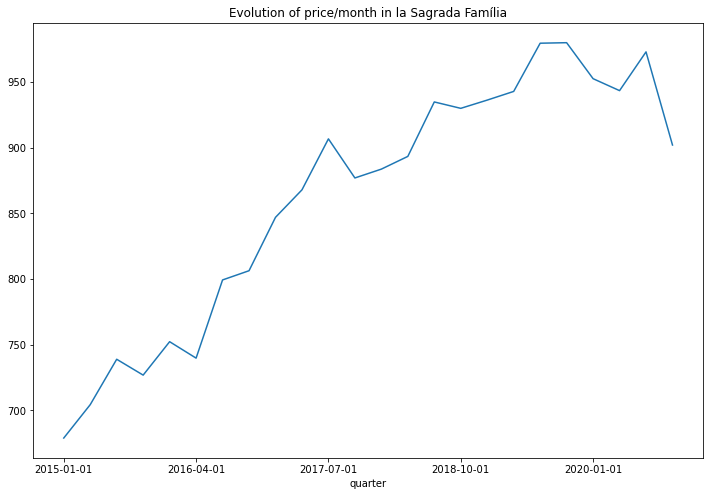

In [11]:
time_series_df['price_month(€)'].plot(figsize=(12,8))
#time_series_df.plot(figsize=(12,8))

_ = plt.title(f'Evolution of price/month in {chosen_neighb}')

In [12]:
# Adding the lag of the target variable from 1 steps back up to 6
for i in range(1, 4):
    time_series_df["lag_{}".format(i)] = time_series_df['price_month(€)'].shift(i, axis=0)

In [13]:
time_series_df

,price_month(€),lag_1,lag_2,lag_3
quarter,,,,
2015-01-01,679.03,NaN,NaN,NaN
2015-04-01,704.44,679.03,NaN,NaN
2015-07-01,739.00,704.44,679.03,NaN
2015-10-01,726.93,739.00,704.44,679.03
2016-01-01,752.37,726.93,739.00,704.44
2016-04-01,739.86,752.37,726.93,739.00
2016-07-01,799.38,739.86,752.37,726.93
2016-10-01,806.40,799.38,739.86,752.37
2017-01-01,847.04,806.40,799.38,739.86


In [14]:
# scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

y = time_series_df['price_month(€)']
X = time_series_df.drop(['price_month(€)'], axis=1)

X_scaled = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns)


In [15]:
def timeseries_train_test_split(X, y, test_size):
    """
        Perform train-test split with respect to time series structure
    """
    
    # get the index after which test set starts
    test_index = int(len(X)*(1-test_size))
    
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return X_train, X_test, y_train, y_test

In [16]:
# reserve 30% of data for testing
X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.3)

In [17]:
X_test

,lag_1,lag_2,lag_3
quarter,,,
2019-01-01,930.02,934.89,893.43
2019-04-01,936.30,930.02,934.89
2019-07-01,942.90,936.30,930.02
2019-10-01,979.60,942.90,936.30
2020-01-01,980.00,979.60,942.90
2020-04-01,952.60,980.00,979.60
2020-07-01,943.50,952.60,980.00
2020-10-01,973.00,943.50,952.60


In [18]:
# xgboost
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X=X_train, y=y_train)
y_pred = xgb.predict(X_test)

In [19]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score

tscv = TimeSeriesSplit(n_splits=5)
cv = cross_val_score(xgb, X_train, y_train, cv=tscv, scoring="neg_mean_absolute_error")

mae = cv.mean() * (-1)
deviation = cv.std()
 
scale = .95
lower = y_pred - (mae + scale * deviation)
upper = y_pred + (mae + scale * deviation)

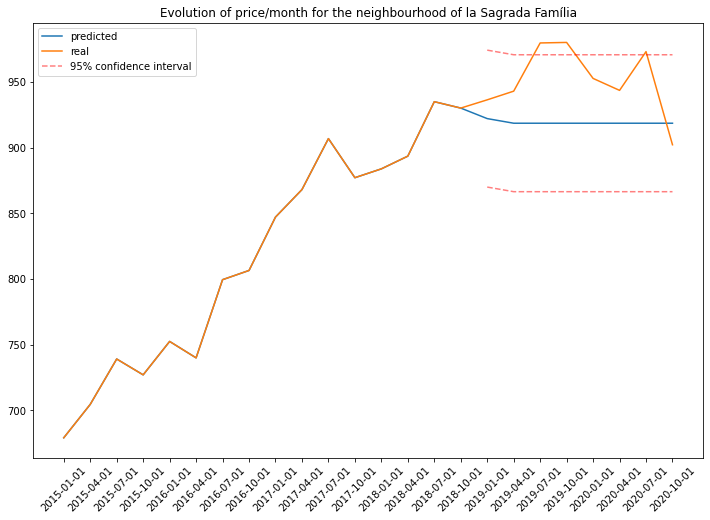

In [20]:
fig = plt.figure(figsize=(12,8))
plt.plot(X.index, np.concatenate((y_train,y_pred)), label='predicted')
plt.plot(X.index, y, label='real')
plt.plot(X_test.index, lower, "r--", label='95% confidence interval', alpha=0.5)
plt.plot(X_test.index, upper, "r--", alpha=0.5)

plt.legend()
_ = plt.xticks(rotation=45)
_ = plt.title(f'Evolution of price/month for the neighbourhood of {chosen_neighb}')

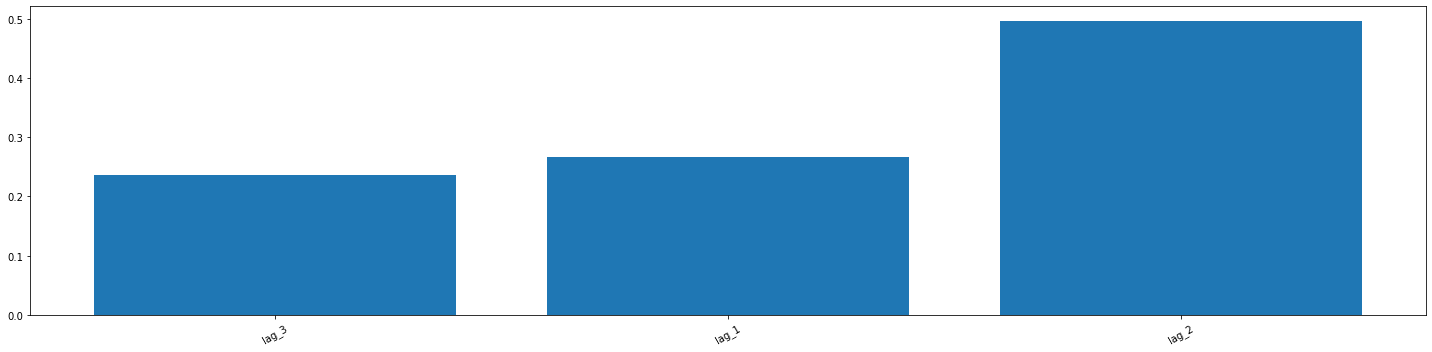

In [21]:
coefficients = pd.Series({k: v for k, v in zip(X.columns, xgb.feature_importances_)}).sort_values()

fig, ax = plt.subplots(figsize=(20, 5))
ax.bar(coefficients.index, coefficients.values)
_ = plt.xticks(rotation=30)
plt.tight_layout()

### Adding more features

In [22]:
all_features_df = pd.concat([time_series_df, 
           df_neighb.drop(columns=['year', 'district_code', 'district_name', 
                                   'neighbourhood_code', 'neighbourhood_name', 'price_month(€)', 'price_m2_month(€)']).set_index('quarter')
          ], axis=1)

In [23]:
all_features_df

,price_month(€),lag_1,lag_2,lag_3,short-term unemployment,long-term unemployment,1 Spanish,1 foreigner,more than 2 foreigners,more than 2 Spanish,no education,medium education,bachelors degree,airbnb_price(€),n_airbnb_listings,availability_365,airbnb_ratio_business,airbnb_professional_ratio,airbnb_mega_host_ratio
quarter,,,,,,,,,,,,,,,,,,,
2015-01-01,679.03,NaN,NaN,NaN,17472.0,13846.0,7630.0,2263.0,2054.0,12322.0,1673.0,28389.0,15568.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-01,704.44,679.03,NaN,NaN,17472.0,13846.0,7630.0,2263.0,2054.0,12322.0,1673.0,28389.0,15568.0,80.245981,622.0,275.231511,0.689711,0.282958,0.033762
2015-07-01,739.00,704.44,679.03,NaN,17472.0,13846.0,7630.0,2263.0,2054.0,12322.0,1673.0,28389.0,15568.0,77.220102,786.0,272.489822,0.604326,0.235369,0.025445
2015-10-01,726.93,739.00,704.44,679.03,17472.0,13846.0,7630.0,2263.0,2054.0,12322.0,1673.0,28389.0,15568.0,76.806803,735.0,284.492517,0.590476,0.182313,0.020408
2016-01-01,752.37,726.93,739.00,704.44,15925.0,11413.0,7549.0,2274.0,2173.0,12266.0,1684.0,27987.0,15957.0,73.430905,796.0,286.433417,0.582915,0.173367,0.016332
2016-04-01,739.86,752.37,726.93,739.00,15925.0,11413.0,7549.0,2274.0,2173.0,12266.0,1684.0,27987.0,15957.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-01,799.38,739.86,752.37,726.93,15925.0,11413.0,7549.0,2274.0,2173.0,12266.0,1684.0,27987.0,15957.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-01,806.40,799.38,739.86,752.37,15925.0,11413.0,7549.0,2274.0,2173.0,12266.0,1684.0,27987.0,15957.0,79.675281,890.0,240.319101,0.557303,0.211236,0.038202
2017-01-01,847.04,806.40,799.38,739.86,15384.0,9660.0,7543.0,2373.0,2380.0,12110.0,1579.0,27764.0,16581.0,79.263430,968.0,238.446281,0.552686,0.238636,0.043388


In [24]:
# scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

y = all_features_df['price_month(€)']
X = all_features_df.drop(['price_month(€)'], axis=1)

X_scaled = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns)

In [25]:
# reserve 30% of data for testing
X_train, X_test, y_train, y_test = timeseries_train_test_split(X_scaled, y, test_size=0.3)

xgb = XGBRegressor()
xgb.fit(X=X_train, y=y_train)
y_pred = xgb.predict(X_test)

In [26]:
cv = cross_val_score(xgb, X_train, y_train, cv=TimeSeriesSplit(n_splits=5), scoring="neg_mean_absolute_error")

mae = cv.mean() * (-1)
deviation = cv.std()
 
scale = .95
lower = y_pred - (mae + scale * deviation)
upper = y_pred + (mae + scale * deviation)

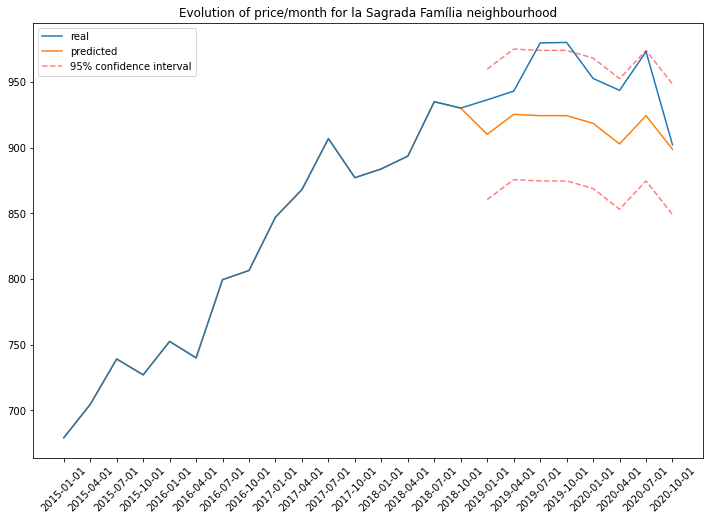

In [27]:
fig = plt.figure(figsize=(12,8))
plt.plot(X.index, y, label='real')
plt.plot(X.index, np.concatenate((y_train,y_pred)), label='predicted',zorder=1)
plt.plot(X_test.index, lower, "r--", label='95% confidence interval', alpha=0.5)
plt.plot(X_test.index, upper, "r--", alpha=0.5)

plt.legend()
_ = plt.xticks(rotation=45)
_ = plt.title(f'Evolution of price/month for {chosen_neighb} neighbourhood')

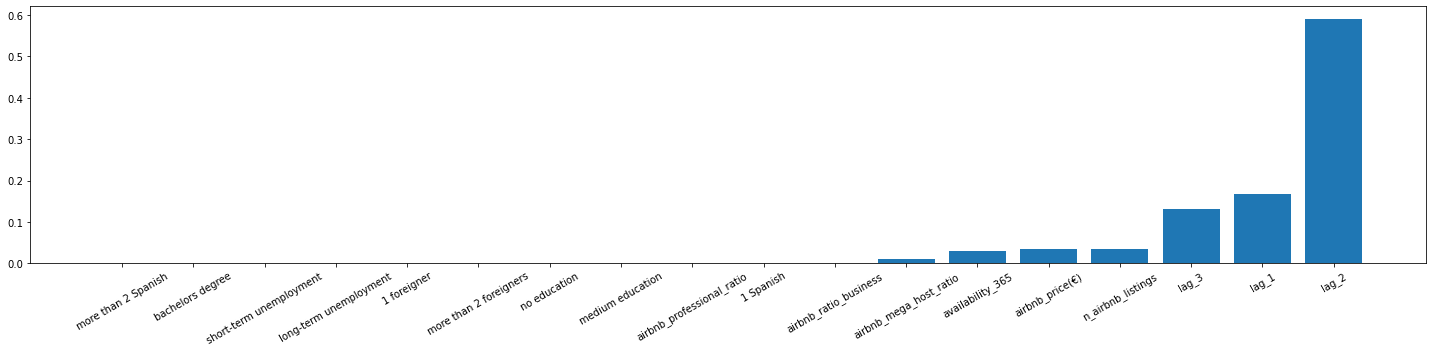

In [28]:
coefficients = pd.Series({k: v for k, v in zip(X.columns, xgb.feature_importances_)}).sort_values()

fig, ax = plt.subplots(figsize=(20, 5))
ax.bar(coefficients.index, coefficients.values)
_ = plt.xticks(rotation=30)
plt.tight_layout()

In [29]:
# Calculate the RMSE
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred, squared=False)

39.360189199091934

## Wrap up the model into a function per neighbourhood

In [42]:
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score

def timeseries_train_test_split(X, y, test_size):
    """
        Perform train-test split with respect to time series structure
    """
    
    # get the index after which test set starts
    test_index = int(len(X)*(1-test_size))
    
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return X_train, X_test, y_train, y_test

def plot_results(xgb, X_train, y_train, X_test, y_test, y_pred, neighbourhood_name, lags, rolling_mean):
    # calculate the confidence intervals
    cv = cross_val_score(xgb, X_train, y_train, cv=TimeSeriesSplit(n_splits=5), scoring="neg_mean_absolute_error")

    mae = cv.mean() * (-1)
    deviation = cv.std()
 
    scale = .95
    lower = y_pred - (mae + scale * deviation)
    upper = y_pred + (mae + scale * deviation)

    # plot the result
    fig = plt.figure(figsize=(12,8))
    plt.plot(np.concatenate((X_train.index, X_test.index)), np.concatenate((y_train,y_pred)), label='predicted', color='tomato')
    plt.plot(np.concatenate((X_train.index, X_test.index)), np.concatenate((y_train,y_test)), label='real', color='royalblue')
    plt.plot(X_test.index, lower, "--", color='tomato', label='95% confidence interval', alpha=0.5)
    plt.plot(X_test.index, upper, "--", color='tomato', alpha=0.5)

    plt.legend()
    plt.xticks(rotation=45)
    
    title = f'XGBoost prediction of price/month for {neighbourhood_name} neighbourhood'
    if lags[1]:
        title += ' -added lags as features'
    if rolling_mean:
        title += ' -added rolling mean as feature'
      
    plt.title(title)

    
def plot_feature_importances(xgb, X, neighb):
    coefficients = pd.Series({k: v for k, v in zip(X.columns, xgb.feature_importances_)}).sort_values(ascending=False)

    fig, ax = plt.subplots(figsize=(20, 5))
    ax.bar(coefficients.index, coefficients.values, color='tomato')
    plt.title(f'XGBoost feature importances for {neighb} neighbourhood')
    plt.xticks(rotation=30)
    plt.tight_layout()
    
    
def predict_rent_xgb(df, lags, rolling_mean=False, neighbourhood_name=None):
    # select just the given neighbourhood
    if neighbourhood_name:
        df_neighb = df[df['neighbourhood_name'] == neighbourhood_name].copy()
    else:
        df_neighb = df.copy()
    
    # set the quarter as index
    df_neighb = df_neighb.set_index('quarter')
    
    # drop year, district_code, district_name, neighbourhood_code and price_m2_month(€)
    if neighbourhood_name:
        df_neighb = df_neighb.drop(columns=['district_name', 'neighbourhood_name'])
    df_neighb = df_neighb.drop(columns=['year', 'district_code', 'neighbourhood_code', 'price_m2_month(€)'])

    # add the lags columns
    if lags[1]:
        for i in range(lags[0], lags[1] + 1):
            df_neighb["lag_{}".format(i)] = df_neighb['price_month(€)'].shift(i, axis=0)
    
    # add the rolling mean
    if rolling_mean:
        df_neighb = df_neighb.assign(window_mean=df_neighb['price_month(€)'].rolling(window=3).mean())

    # scale the data
    scaler = StandardScaler()

    y = df_neighb['price_month(€)']
    X = df_neighb.drop(['price_month(€)'], axis=1)

    X_scaled = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns)
    
    # reserve 30% of data for testing
    X_train, X_test, y_train, y_test = timeseries_train_test_split(X_scaled, y, test_size=0.2)

    # apply the model
    xgb = XGBRegressor()
    xgb.fit(X=X_train, y=y_train)
    y_pred = xgb.predict(X_test)
    
    # plot the results
    plot_results(xgb, X_train, y_train, X_test, y_test, y_pred, neighbourhood_name, lags, rolling_mean)

    # plot the feature importances
    plot_feature_importances(xgb, X, neighbourhood_name)
    plt.show()
    
    return y_test, y_pred


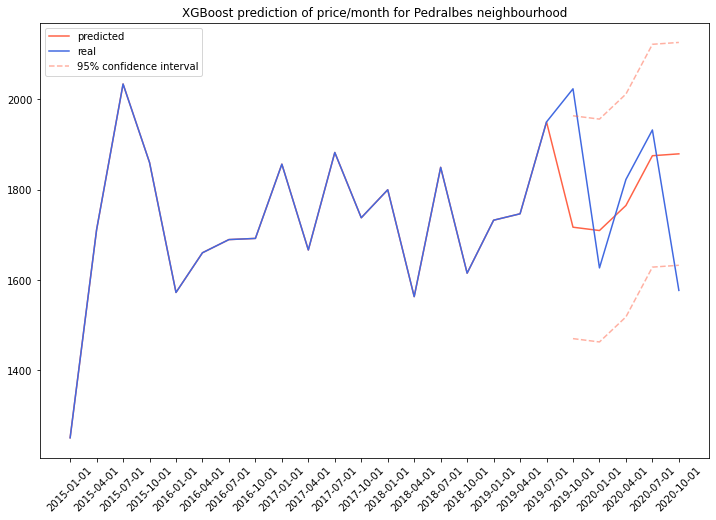

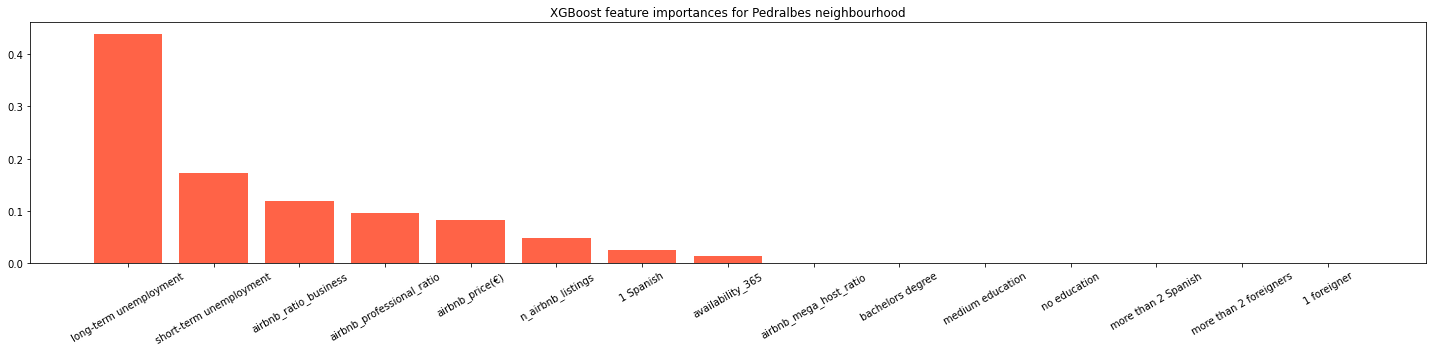

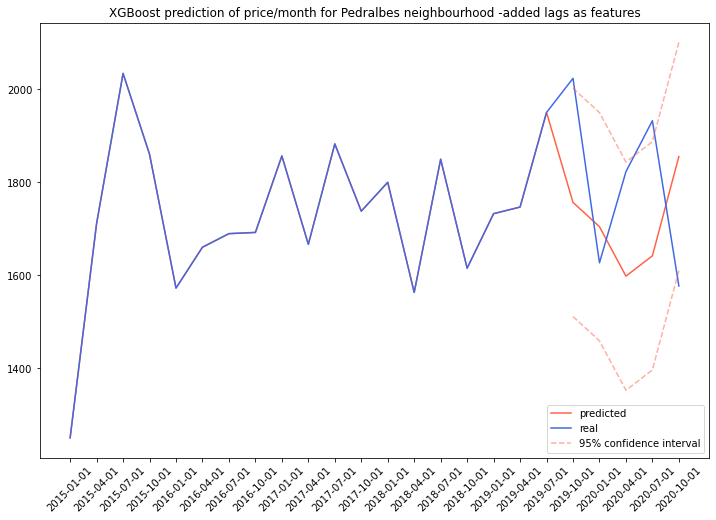

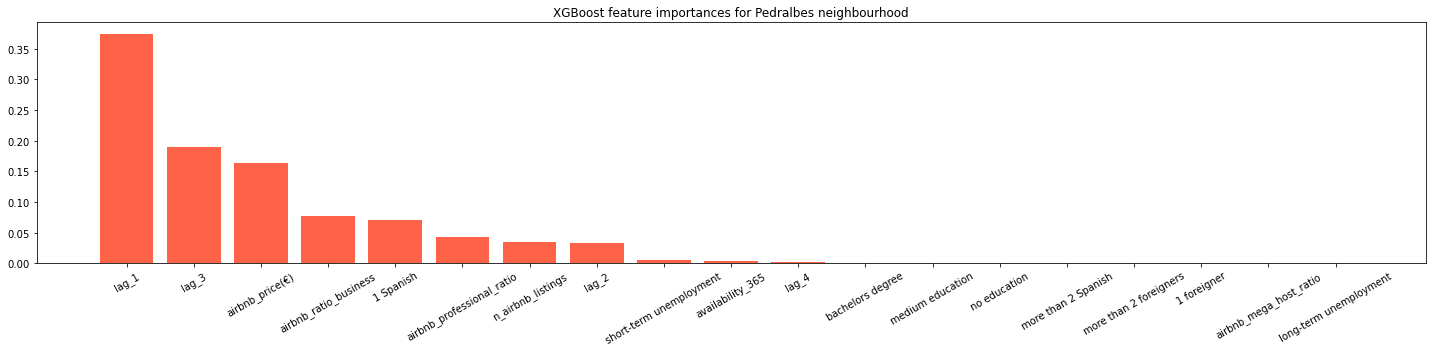

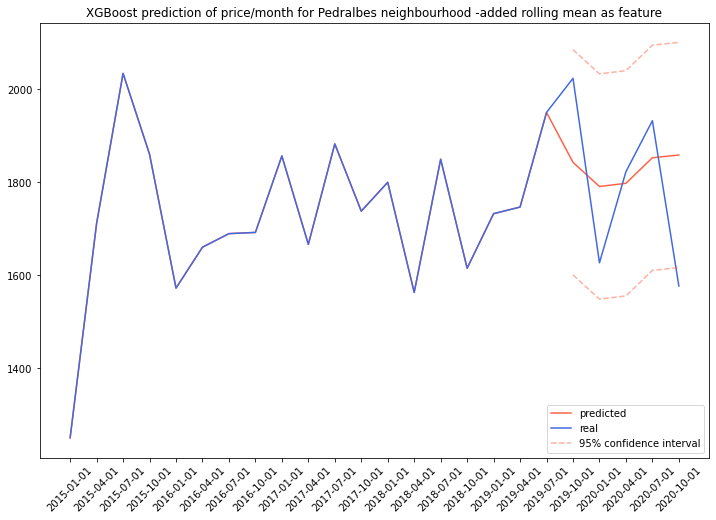

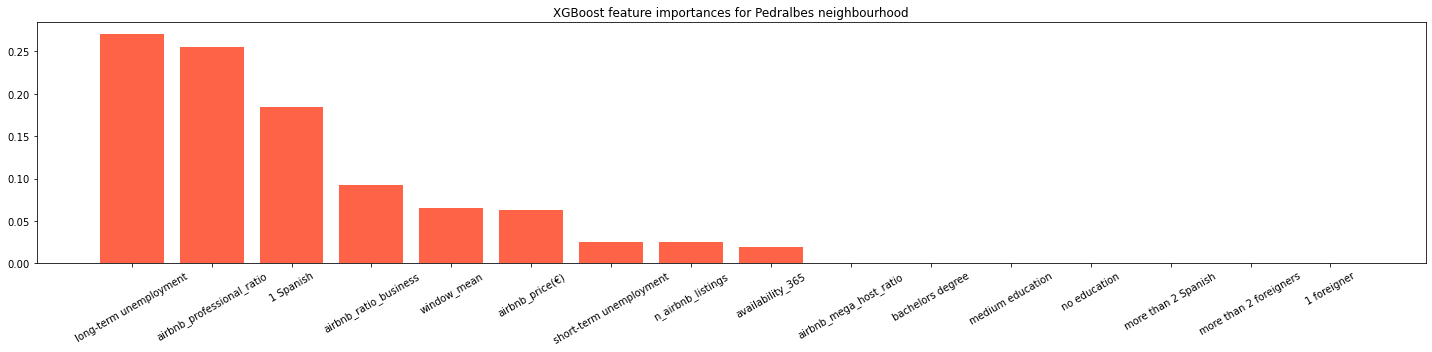

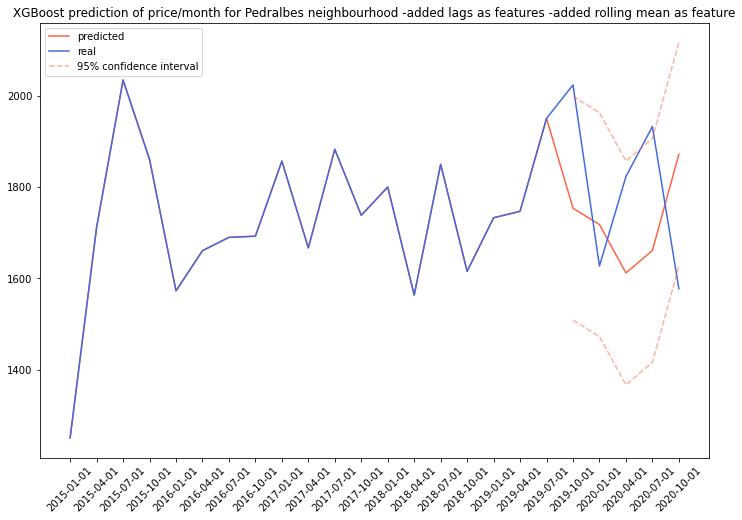

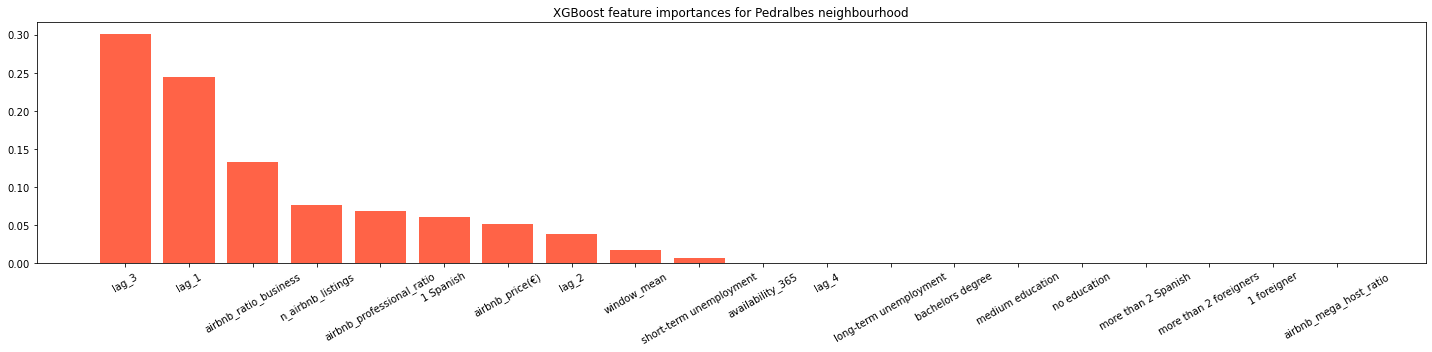


Mean Square Error - no lags - Pedralbes: 199.34

Mean Square Error - with lags - Pedralbes: 240.50

Mean Square Error - with rolling mean - Pedralbes: 170.66

Mean Square Error - with lags and rolling mean - Pedralbes: 239.09


In [43]:
real_pedralbes, forecast_pedralbes = predict_rent_xgb(df, lags=(0, 0), neighbourhood_name="Pedralbes")
real_pedralbes, forecast_lags_pedralbes = predict_rent_xgb(df, lags=(1, 4), neighbourhood_name="Pedralbes")
real_pedralbes, forecast_rolling_pedralbes = predict_rent_xgb(df, lags=(0, 0), rolling_mean=True, neighbourhood_name="Pedralbes")
real_pedralbes, forecast_lag_rolling_pedralbes = predict_rent_xgb(df, lags=(1, 4), rolling_mean=True, neighbourhood_name="Pedralbes")

forecast_pedralbes_rmse = mean_squared_error(real_pedralbes, forecast_pedralbes, squared=False)
forecast_lags_pedralbes_rmse = mean_squared_error(real_pedralbes, forecast_lags_pedralbes, squared=False)
forecast_rolling_pedralbes_rmse = mean_squared_error(real_pedralbes, forecast_rolling_pedralbes, squared=False)
forecast_lag_rolling_pedralbes_rmse = mean_squared_error(real_pedralbes, forecast_lag_rolling_pedralbes, squared=False)

print(f'\nMean Square Error - no lags - Pedralbes: {forecast_pedralbes_rmse:.2f}')
print(f'\nMean Square Error - with lags - Pedralbes: {forecast_lags_pedralbes_rmse:.2f}')
print(f'\nMean Square Error - with rolling mean - Pedralbes: {forecast_rolling_pedralbes_rmse:.2f}')
print(f'\nMean Square Error - with lags and rolling mean - Pedralbes: {forecast_lag_rolling_pedralbes_rmse:.2f}')

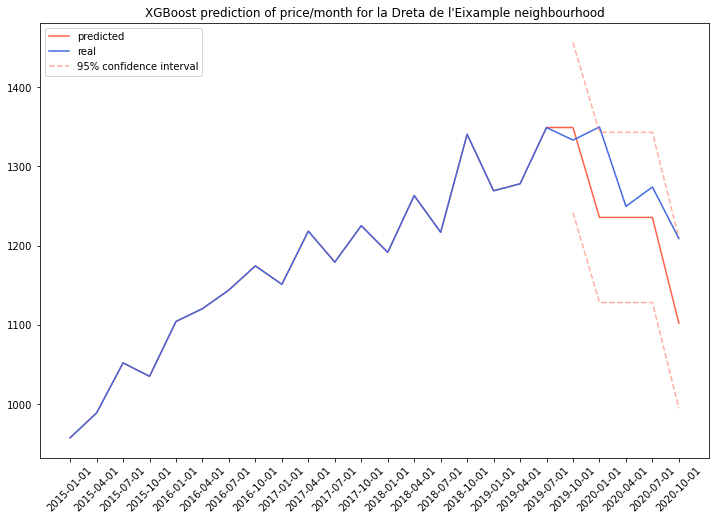

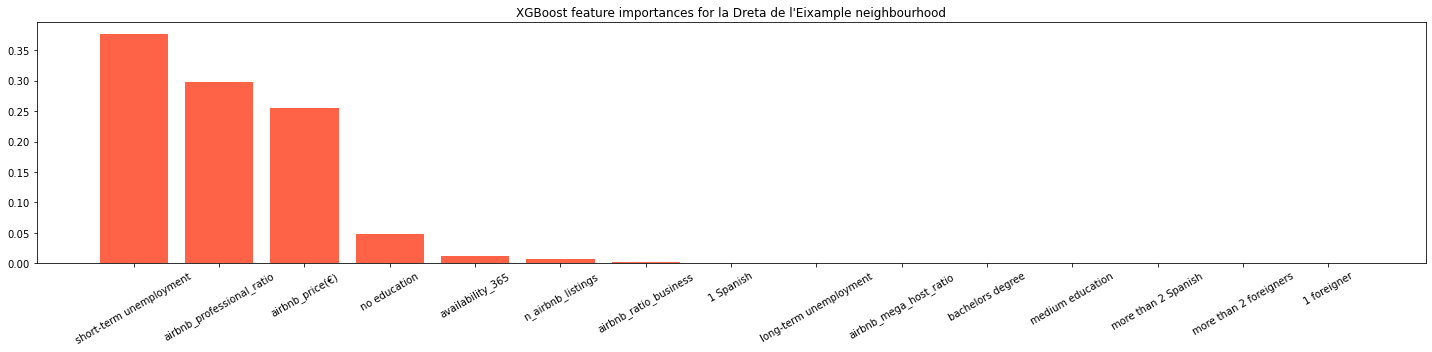

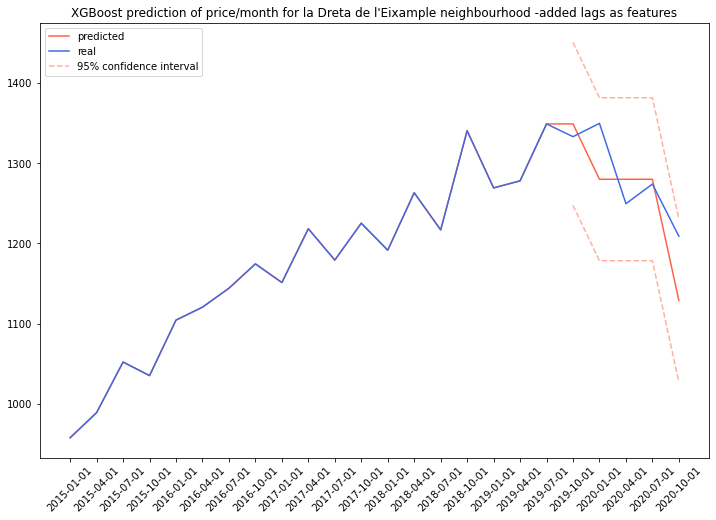

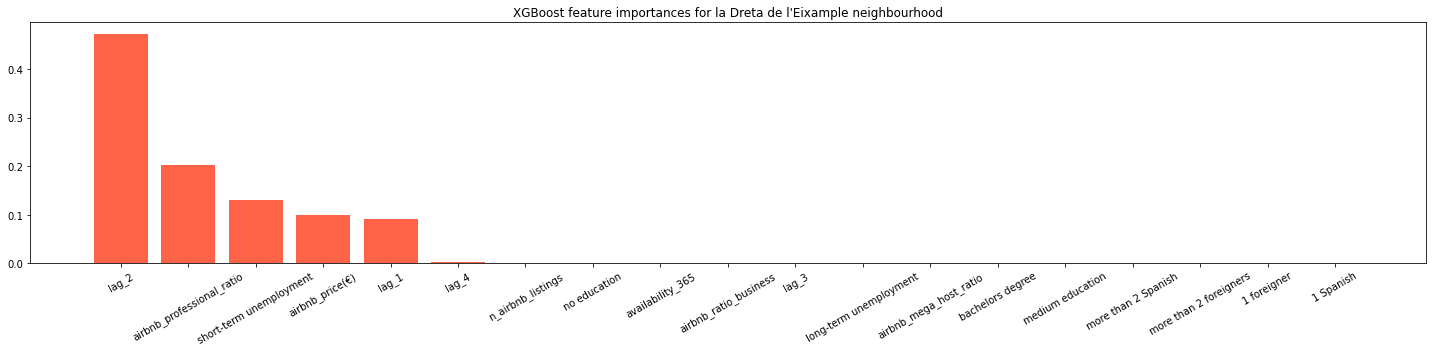

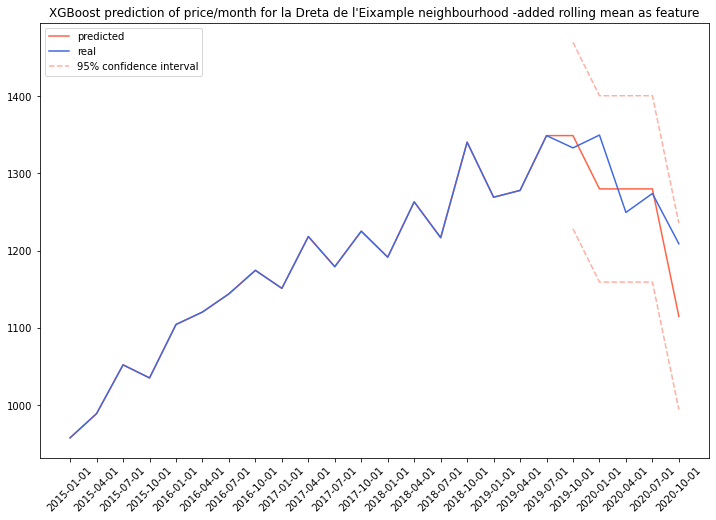

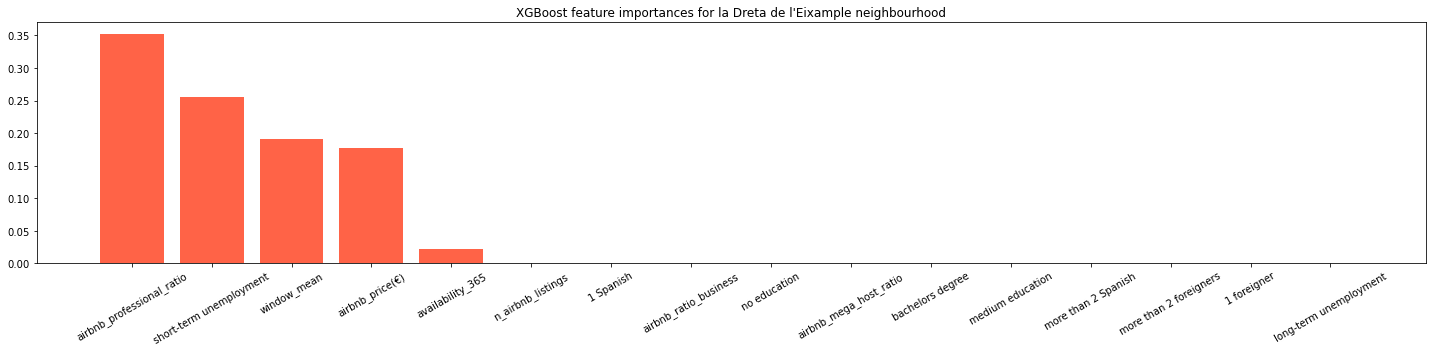

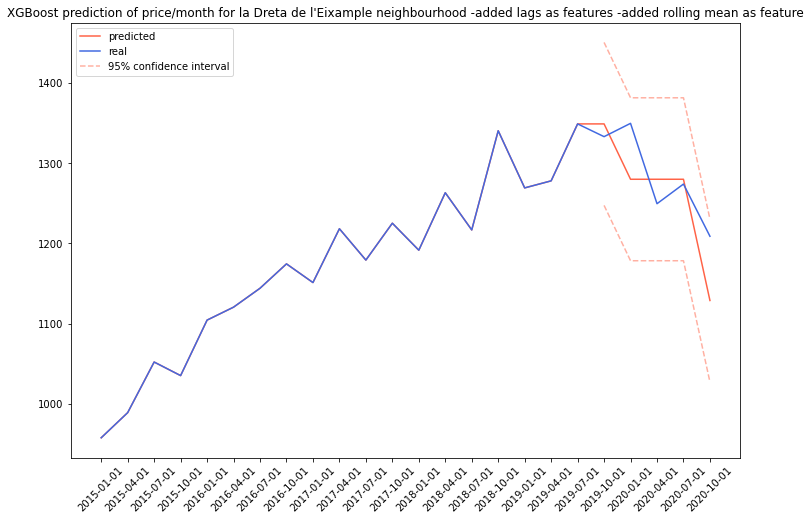

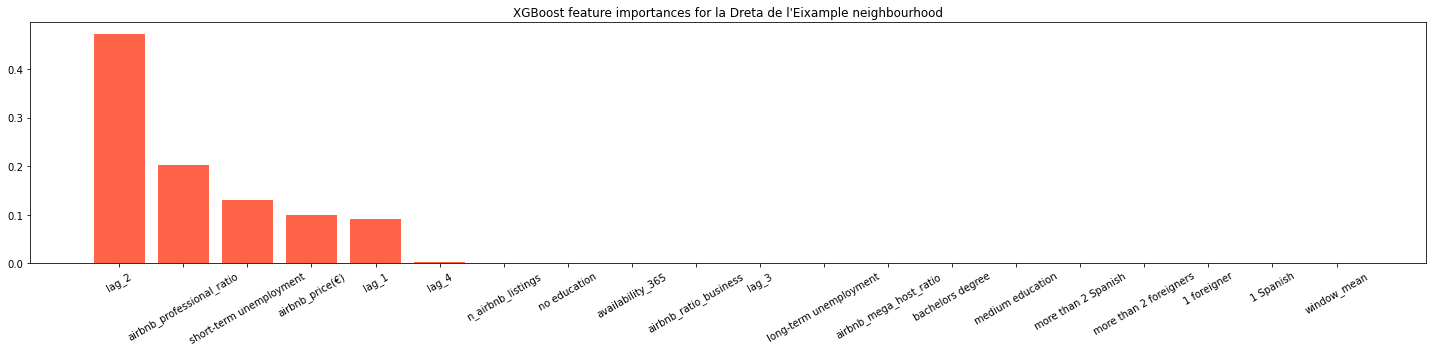

Mean Square Error - no lags - la Dreta de l'Eixample: 72.56
Mean Square Error - with lags - la Dreta de l'Eixample: 49.98
Mean Square Error - with rolling mean - la Dreta de l'Eixample: 54.63
Mean Square Error - with lags and rolling mean - la Dreta de l'Eixample: 49.98


In [44]:
real_eixample, forecast_eixample = predict_rent_xgb(df, lags=(0, 0), neighbourhood_name="la Dreta de l'Eixample")
real_eixample, forecast_lags_eixample = predict_rent_xgb(df, lags=(1, 4), neighbourhood_name="la Dreta de l'Eixample")
real_eixample, forecast_rolling_eixample = predict_rent_xgb(df, lags=(0, 0), rolling_mean=True, neighbourhood_name="la Dreta de l'Eixample")
real_eixample, forecast_lags_rolling_eixample = predict_rent_xgb(df, lags=(1, 4), rolling_mean=True, neighbourhood_name="la Dreta de l'Eixample")

forecast_eixample_rmse = mean_squared_error(real_eixample, forecast_eixample, squared=False)
forecast_lags_eixample_rmse = mean_squared_error(real_eixample, forecast_lags_eixample, squared=False)
forecast_rolling_eixample_rmse = mean_squared_error(real_eixample, forecast_rolling_eixample, squared=False)
forecast_lags_rolling_eixample_rmse = mean_squared_error(real_eixample, forecast_lags_rolling_eixample, squared=False)

print(f"Mean Square Error - no lags - la Dreta de l'Eixample: {forecast_eixample_rmse:.2f}")
print(f"Mean Square Error - with lags - la Dreta de l'Eixample: {forecast_lags_eixample_rmse:.2f}")
print(f"Mean Square Error - with rolling mean - la Dreta de l'Eixample: {forecast_rolling_eixample_rmse:.2f}")
print(f"Mean Square Error - with lags and rolling mean - la Dreta de l'Eixample: {forecast_lags_rolling_eixample_rmse:.2f}")

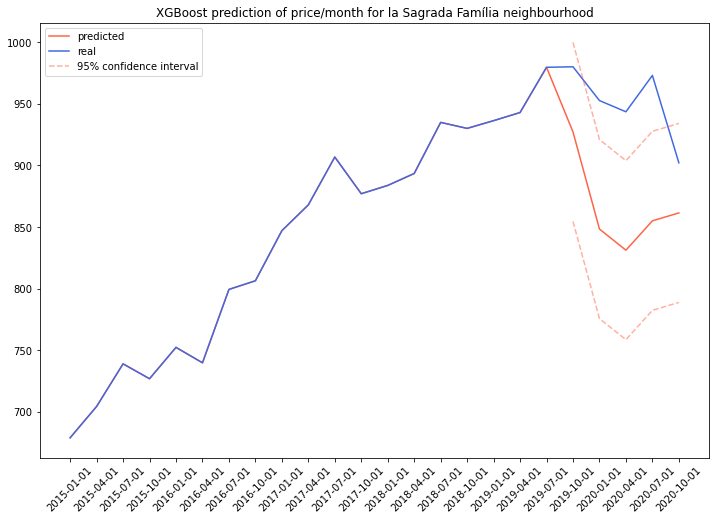

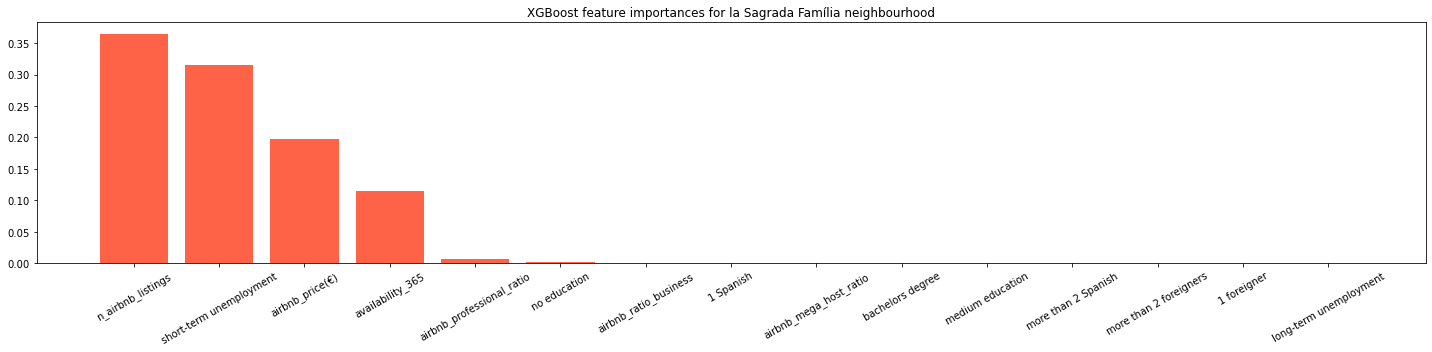

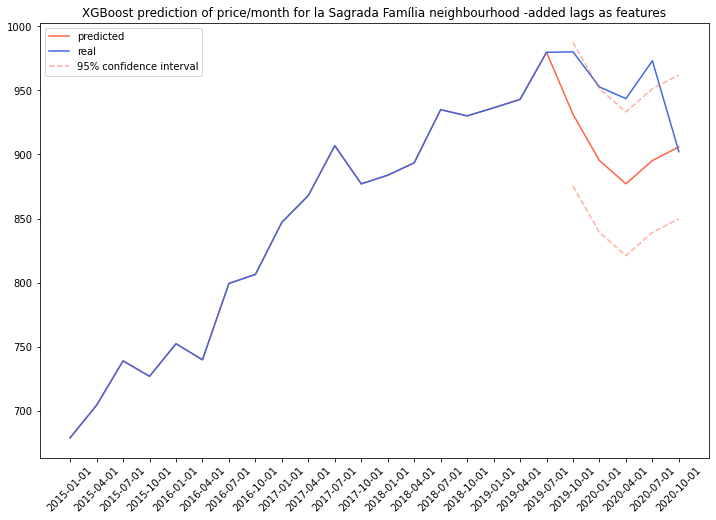

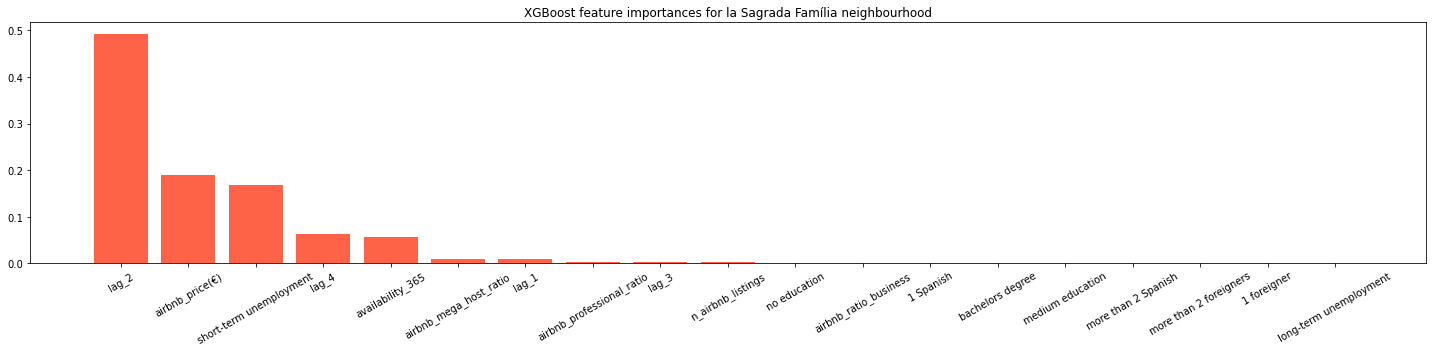

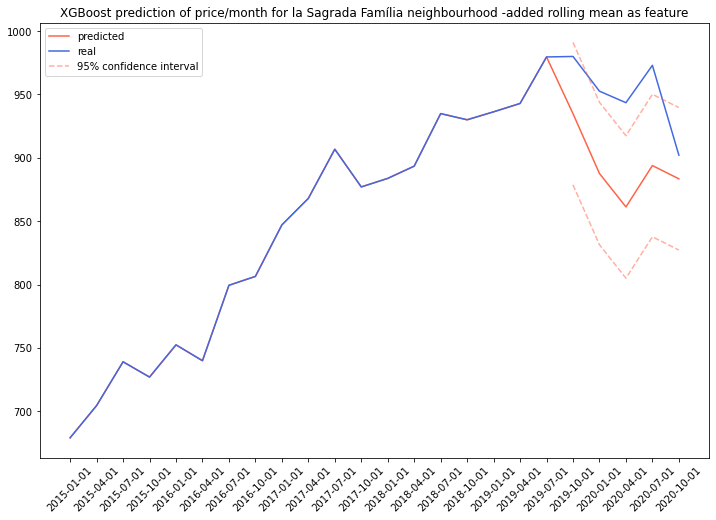

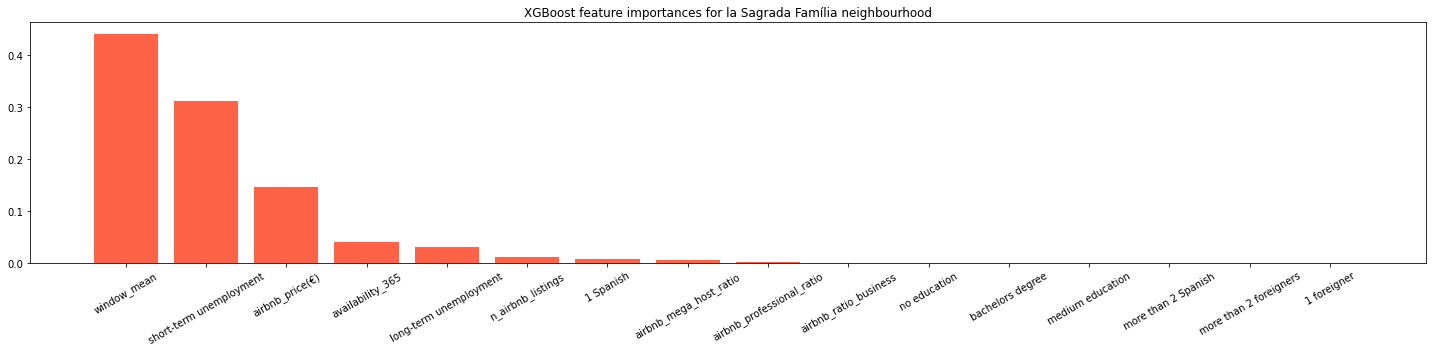

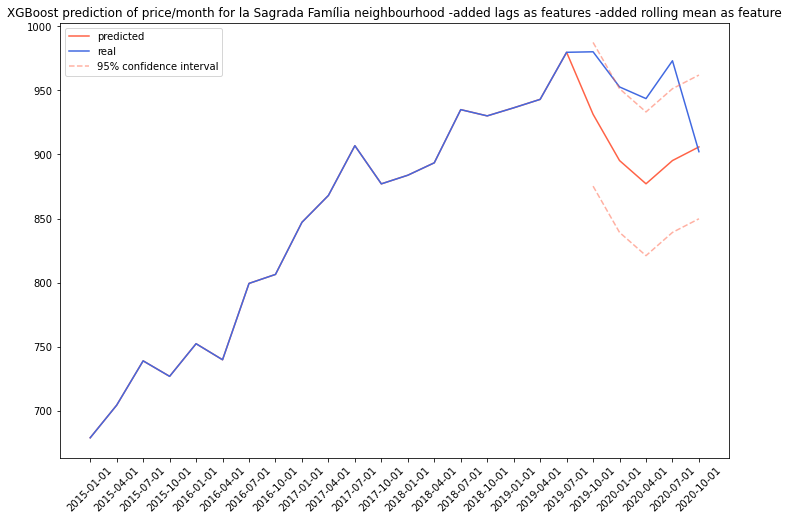

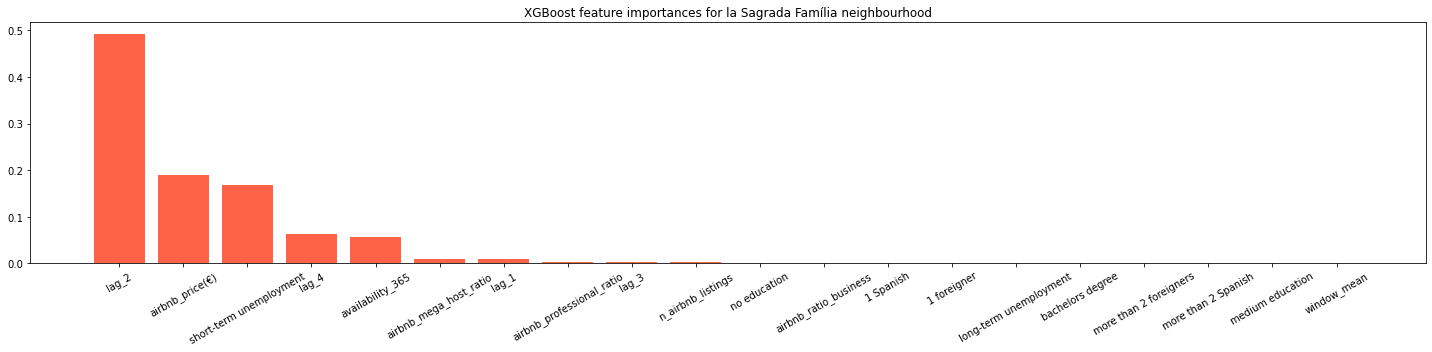

Mean Square Error - no lags - la Sagrada Família: 91.47
Mean Square Error - with lags - la Sagrada Família: 56.84
Mean Square Error - with rolling mean - la Sagrada Família: 62.67
Mean Square Error - with lags and rolling mean - la Sagrada Família: 56.84


In [45]:
real_sagrada_familia, forecast_sagrada_familia = predict_rent_xgb(df, lags=(0, 0), neighbourhood_name="la Sagrada Família")
real_sagrada_familia, forecast_lags_sagrada_familia = predict_rent_xgb(df, lags=(1, 4), neighbourhood_name="la Sagrada Família")
real_sagrada_familia, forecast_rolling_sagrada_familia = predict_rent_xgb(df, lags=(0, 0), rolling_mean=True, neighbourhood_name="la Sagrada Família")
real_sagrada_familia, forecast_lags_rolling_sagrada_familia = predict_rent_xgb(df, lags=(1, 4), rolling_mean=True, neighbourhood_name="la Sagrada Família")

forecast_sagrada_familia_rmse = mean_squared_error(real_sagrada_familia, forecast_sagrada_familia, squared=False)
forecast_lags_sagrada_familia_rmse = mean_squared_error(real_sagrada_familia, forecast_lags_sagrada_familia, squared=False)
forecast_rolling_sagrada_familia_rmse = mean_squared_error(real_sagrada_familia, forecast_rolling_sagrada_familia, squared=False)
forecast_lags_rolling_sagrada_familia_rmse = mean_squared_error(real_sagrada_familia, forecast_lags_rolling_sagrada_familia, squared=False)

print(f'Mean Square Error - no lags - la Sagrada Família: {forecast_sagrada_familia_rmse:.2f}')
print(f'Mean Square Error - with lags - la Sagrada Família: {forecast_lags_sagrada_familia_rmse:.2f}')
print(f'Mean Square Error - with rolling mean - la Sagrada Família: {forecast_rolling_sagrada_familia_rmse:.2f}')
print(f'Mean Square Error - with lags and rolling mean - la Sagrada Família: {forecast_lags_rolling_sagrada_familia_rmse:.2f}')

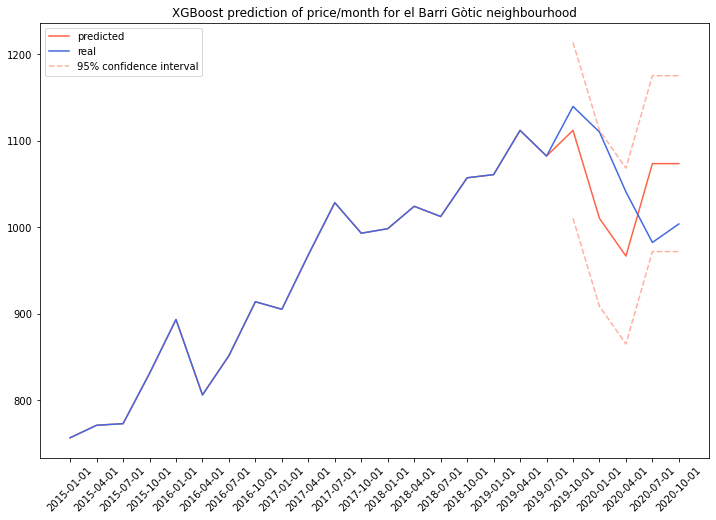

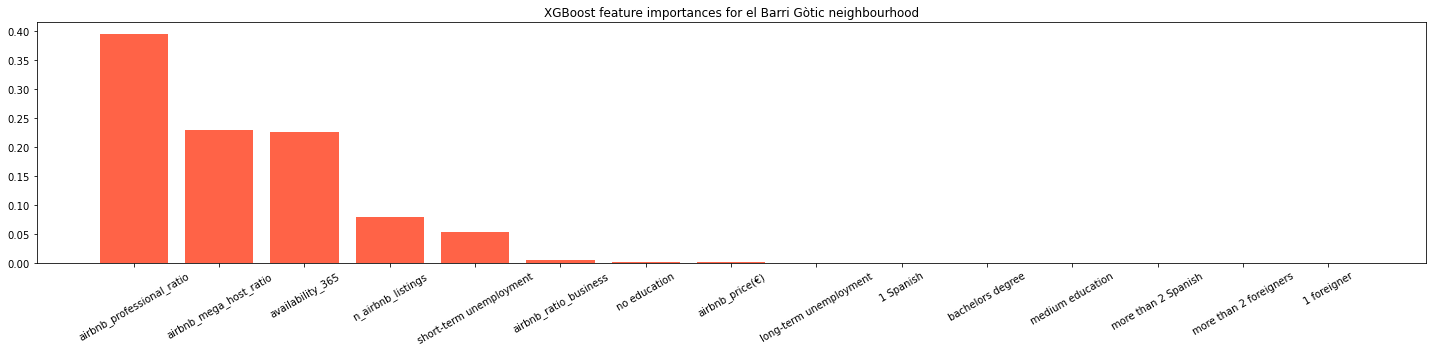

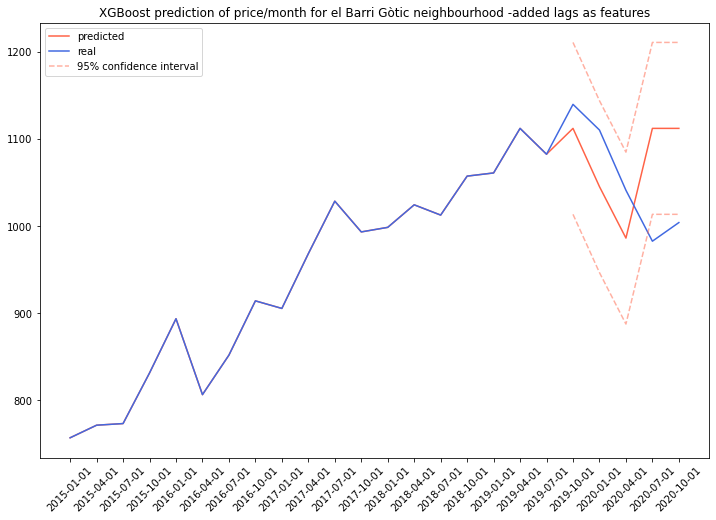

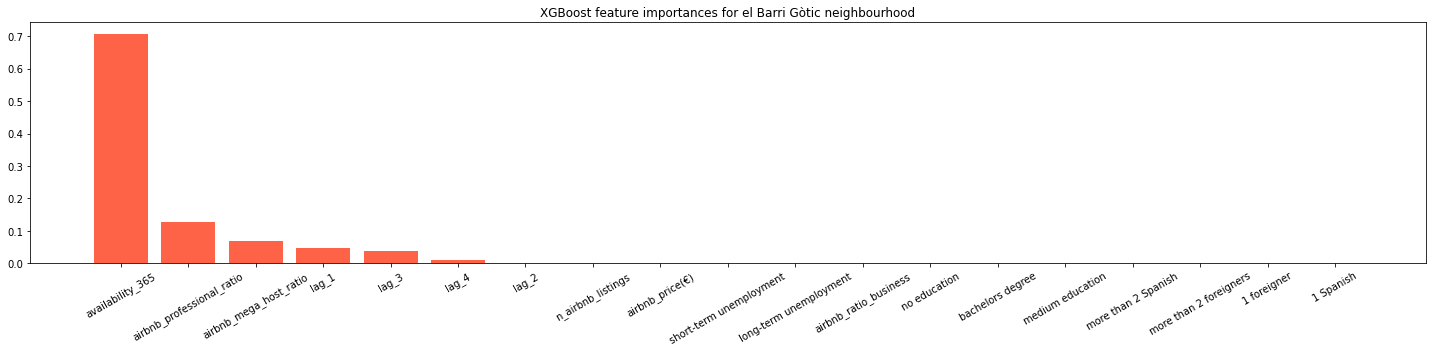

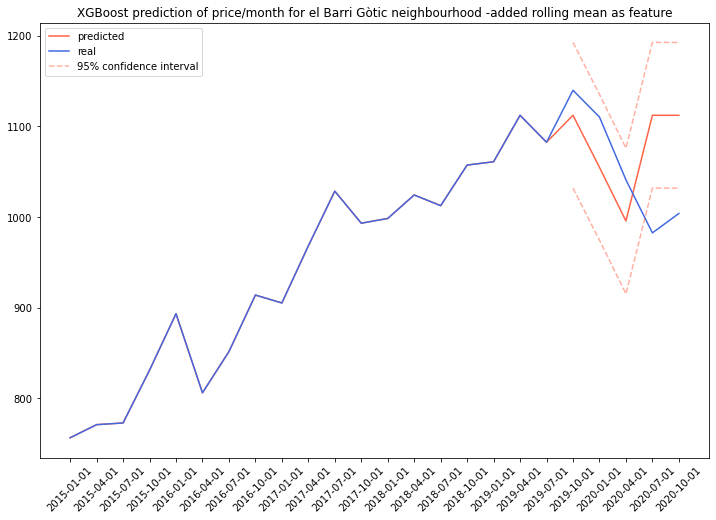

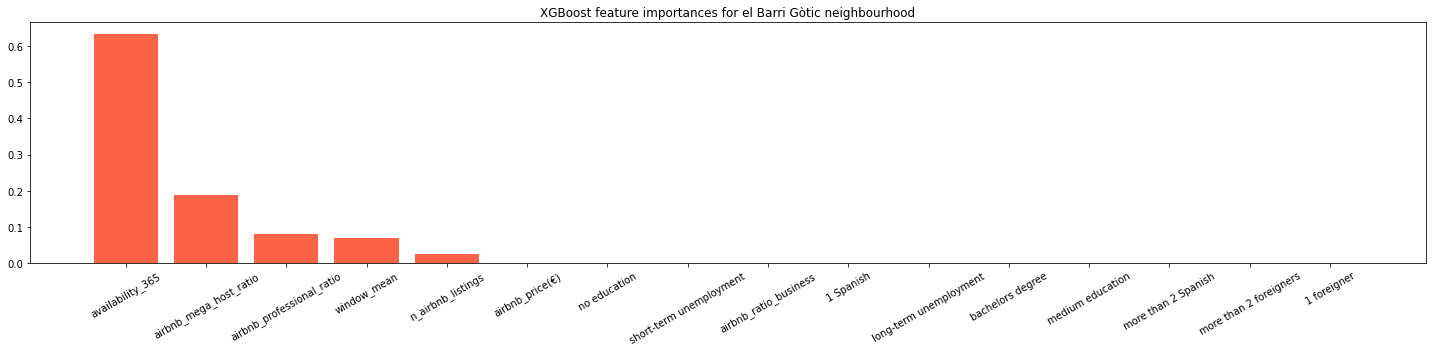

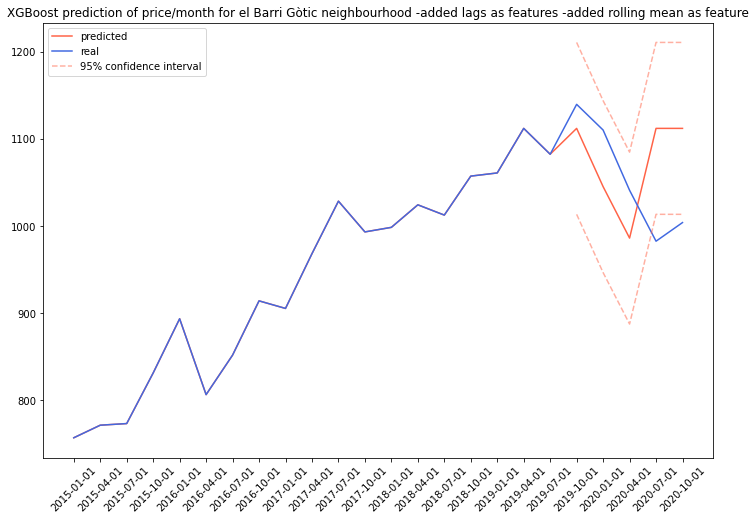

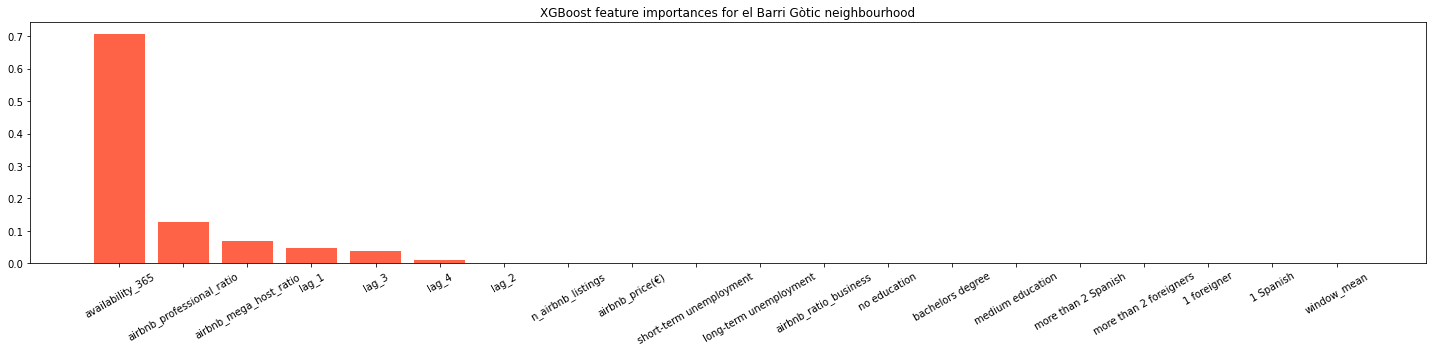

Mean Square Error - no lags - el Barri Gòtic: 76.70
Mean Square Error - with lags - el Barri Gòtic: 85.45
Mean Square Error - with rolling mean - el Barri Gòtic: 82.94
Mean Square Error - with lags and rolling mean - el Barri Gòtic: 85.45


In [46]:
real_barri_gotic, forecast_barri_gotic = predict_rent_xgb(df, lags=(0, 0), neighbourhood_name="el Barri Gòtic")
real_barri_gotic, forecast_lags_barri_gotic = predict_rent_xgb(df, lags=(1, 4), neighbourhood_name="el Barri Gòtic")
real_barri_gotic, forecast_rolling_barri_gotic = predict_rent_xgb(df, lags=(0, 0), rolling_mean=True, neighbourhood_name="el Barri Gòtic")
real_barri_gotic, forecast_lags_rolling_barri_gotic = predict_rent_xgb(df, lags=(1, 4), rolling_mean=True, neighbourhood_name="el Barri Gòtic")

forecast_barri_gotic_rmse = mean_squared_error(real_barri_gotic, forecast_barri_gotic, squared=False)
forecast_lags_barri_gotic_rmse = mean_squared_error(real_barri_gotic, forecast_lags_barri_gotic, squared=False)
forecast_rolling_barri_gotic_rmse = mean_squared_error(real_barri_gotic, forecast_rolling_barri_gotic, squared=False)
forecast_lags_rolling_barri_gotic_rmse = mean_squared_error(real_barri_gotic, forecast_lags_rolling_barri_gotic, squared=False)

print(f'Mean Square Error - no lags - el Barri Gòtic: {forecast_barri_gotic_rmse:.2f}')
print(f'Mean Square Error - with lags - el Barri Gòtic: {forecast_lags_barri_gotic_rmse:.2f}')
print(f'Mean Square Error - with rolling mean - el Barri Gòtic: {forecast_rolling_barri_gotic_rmse:.2f}')
print(f'Mean Square Error - with lags and rolling mean - el Barri Gòtic: {forecast_lags_rolling_barri_gotic_rmse:.2f}')

## XGBoost + lags model for all Barcelona

What if we aggregate for all the neighbourhoods of Barcelona?

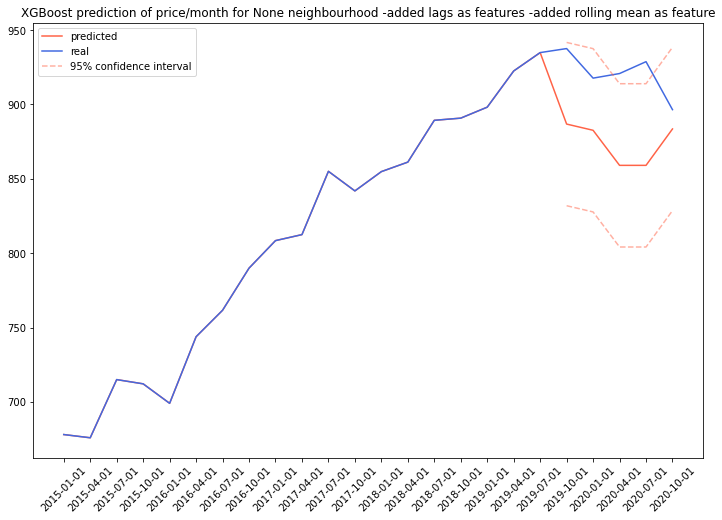

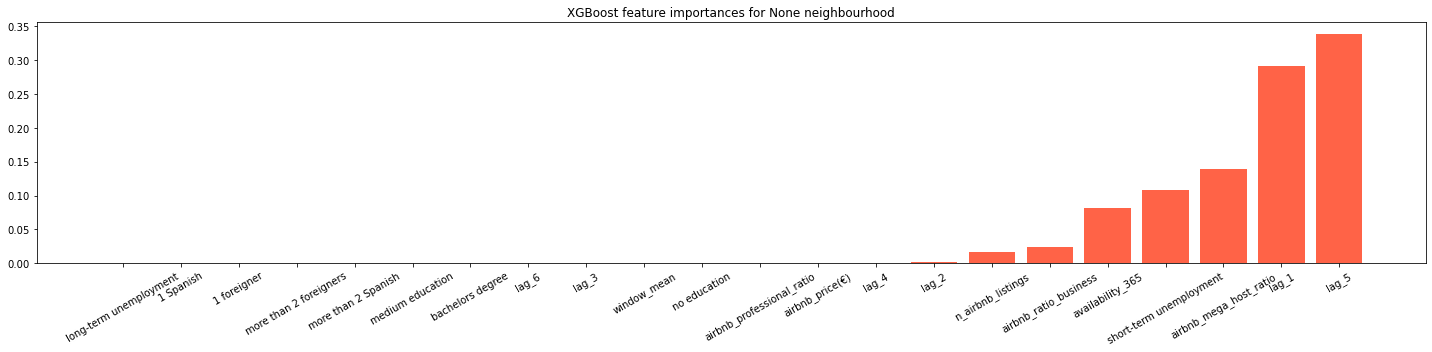

(quarter
 2019-10-01    937.564706
 2020-01-01    917.686957
 2020-04-01    920.775758
 2020-07-01    928.755224
 2020-10-01    896.486567
 Name: price_month(€), dtype: float64,
 array([886.7958 , 882.6146 , 859.03723, 859.03723, 883.5165 ],
       dtype=float32))

In [35]:
agg_barcelona_df = df.groupby(by='quarter').mean().reset_index()
predict_rent_xgb(agg_barcelona_df, lags=(1, 6), rolling_mean=True)